<a href="https://colab.research.google.com/github/Uttamkumar-hub/greenhousegasemmison/blob/main/greenhousegasemmison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/drive/MyDrive/SupplyChainEmissionFactorsforUSIndustriesCommodities2.xlsx"
sheet = "2016_Summary_Industry"
df = pd.read_excel("/content/drive/MyDrive/SupplyChainEmissionFactorsforUSIndustriesCommodities2.xlsx")



In [ ]:
# Clean the data
df_cleaned = df.dropna(subset=['Supply Chain GHG Emission Factors for US Commodities and Industries'])
df_cleaned = df_cleaned.drop_duplicates()


In [ ]:
# Print exact column names
print(df.columns.tolist())


['Name', 'Supply Chain GHG Emission Factors for US Commodities and Industries']


In [ ]:
# Group by industry and sum the emissions
industry_emissions = df_cleaned.groupby('Name')['Supply Chain GHG Emission Factors for US Commodities and Industries'].sum()
industry_emissions_sorted = industry_emissions.sort_values(ascending=False)

# Top 10 industries
top_10 = industry_emissions_sorted.head(10)
print(top_10)

Name
DOI                              http://doi.org/10.23719/1517769
Authors                                  Wesley Ingwersen, Mo Li
Description    Tables presenting supply chain and margin emis...
Name: Supply Chain GHG Emission Factors for US Commodities and Industries, dtype: object


/tmp/ipython-input-14-1069438691.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, palette="Reds_r")
/tmp/ipython-input-14-1069438691.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


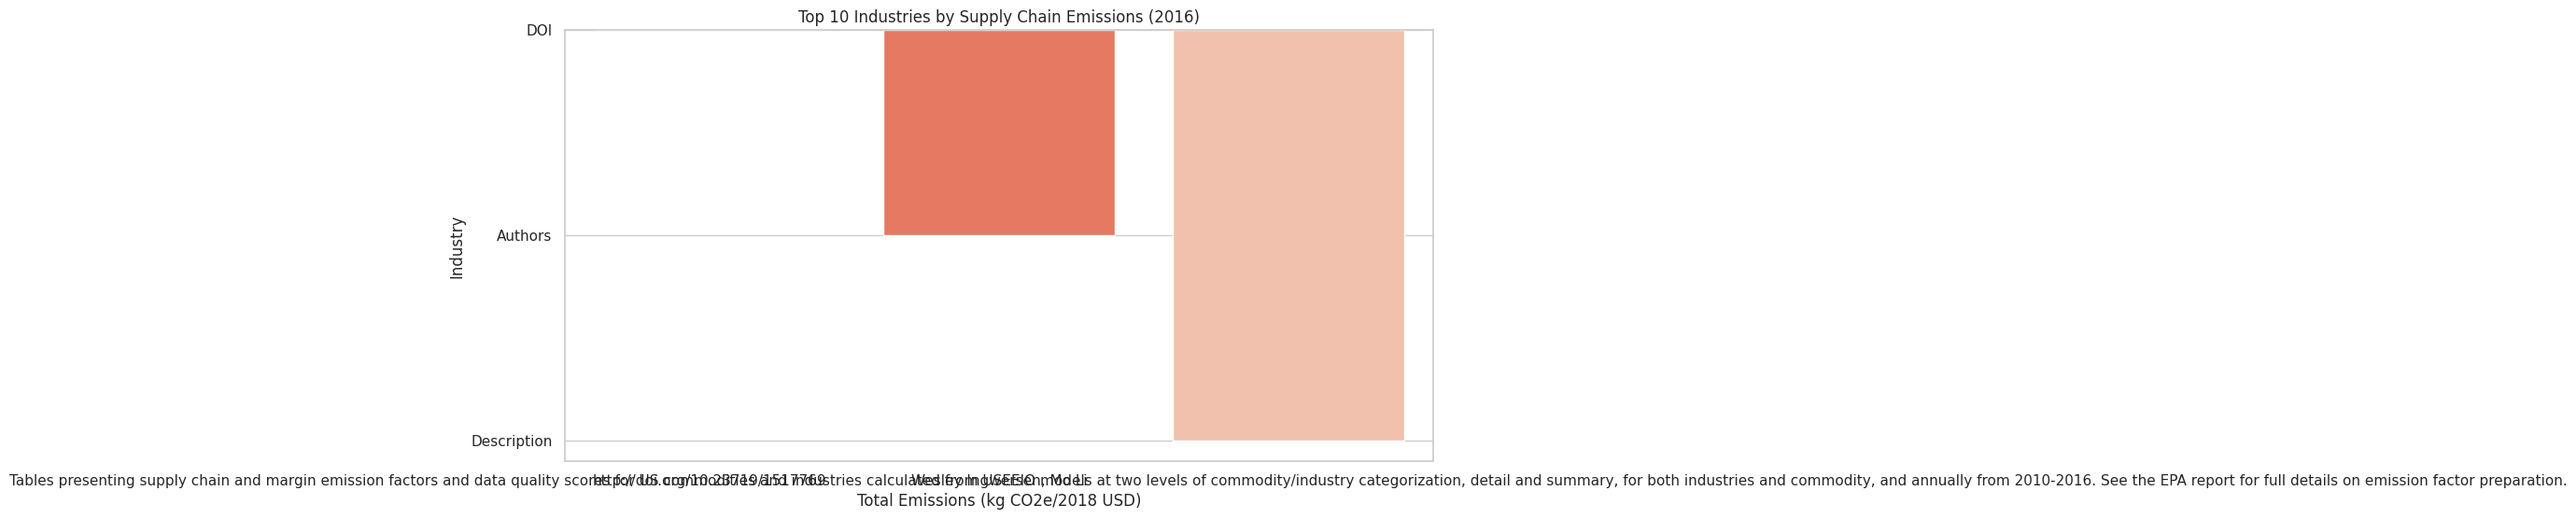

In [ ]:
# Bar Chart
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10.values, y=top_10.index, palette="Reds_r")
plt.title("Top 10 Industries by Supply Chain Emissions (2016)")
plt.xlabel("Total Emissions (kg CO2e/2018 USD)")
plt.ylabel("Industry")
plt.tight_layout()
plt.savefig("top_10_industries_emissions.png")
plt.show()

/tmp/ipython-input-15-2441398.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


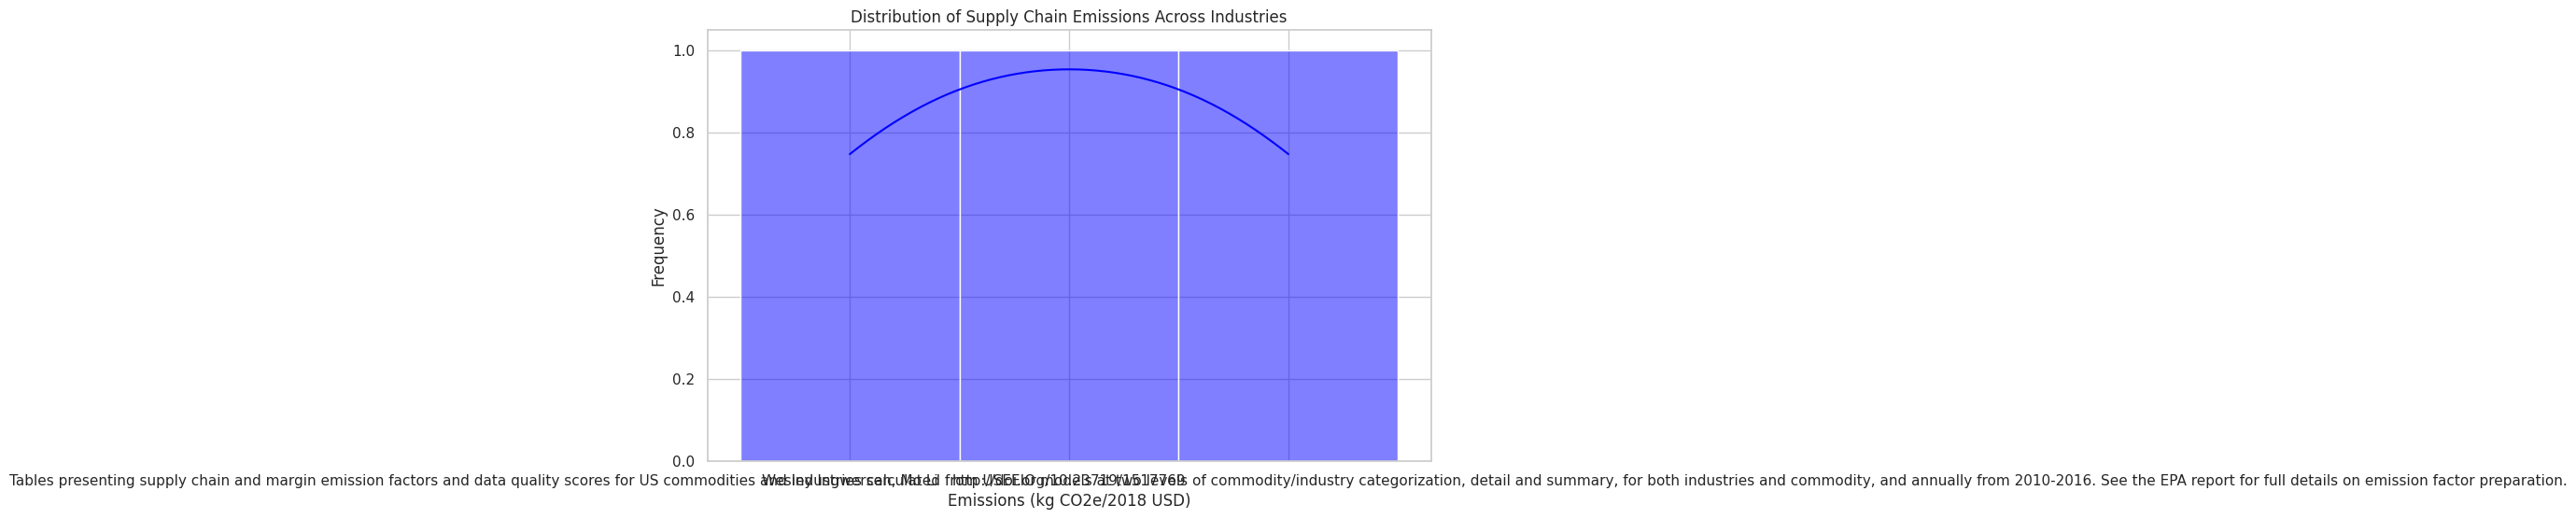

In [ ]:
# Histogram of emission distribution
plt.figure(figsize=(10, 6))
sns.histplot(industry_emissions, bins=30, kde=True, color='blue')
plt.title("Distribution of Supply Chain Emissions Across Industries")
plt.xlabel("Emissions (kg CO2e/2018 USD)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("emission_distribution_histogram.png")
plt.show()